# Import dataset and apply data preprocessing

In [1]:
## The dataset used in this example is taken from Twitter. Various NLP methods and Sentimental Analysis methods has been carried out below

In [30]:
import pandas as pd
import nltk
from nltk.tokenize import regexp_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from autocorrect import spell
from textblob import TextBlob

In [31]:
ds= pd.read_csv("train.csv")

In [32]:
#Drop unwanted columns from dataset
ds.drop(["id", "keyword"], axis = 1, inplace = True) 

In [33]:
#remove special characters in text column of dataset
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    ds['text'] = ds['text'].str.replace(char, ' ')

In [34]:
#apply word tokanization in text column of dataset
ds['tokenized_sents'] = ds.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [35]:
#remove stop-words from the text column of dataset
stop_words = stopwords.words('english')
stop_words1 = [x for x in stop_words if "n'" not in x] 
stop_words2 = [x for x in stop_words1 if x not in ('against','aren','after','no','nor','not','only','too','very','haven','couldn','didn','doesn','hadn','hasn','haven','isn','ma','mightn','mustn','needn','shan','shouldn','wasn','weren','won','wouldn')]
ds['stopwords_sents'] = ds['tokenized_sents'].apply(lambda x: [item for item in x if item.lower() not in stop_words2])

In [36]:
#stemming 
stemming = PorterStemmer()
ds['stemming'] = ds['stopwords_sents'].apply(lambda x: [stemming.stem(item) for item in x])

In [37]:
#Lemmatization
lemmatizer = WordNetLemmatizer() 
ds['lemmatizer'] = ds['stopwords_sents'].apply(lambda x: [lemmatizer.lemmatize(item, pos ='v') for item in x])

In [ ]:
#Autocorrect
def autocorrect_spell(row):
    hg= row['processed']
    g=[]
    #g=(str(' '.join([spell(word) for word in hg])))
    g.append(spell(str(hg))) 
    return g
ds['corrected_speller'] = ds.apply(autocorrect_spell, axis=1)

from textblob import TextBlob

def autocorrect_tx(row):
    hg= row['processed']
    g=[]
    #for word in hg:
    g.append(str(TextBlob(str(hg)).correct()))
    return g
ds['corrected_textblob'] = ds.apply(autocorrect_tx, axis=1)

# Get City,State, and Country from Location field

In [ ]:
import locationtagger
#data2.to_csv(r'country.csv')
def loc(row):
    hg_list = row['location']
    entities = locationtagger.find_locations(text = hg_list)
    return (entities.countries)

ds['country'] = ds.apply(loc, axis=1)
def loc(row):
    hg_list = row['location']
    entities = locationtagger.find_locations(text = hg_list)
    return (entities.cities)

ds['city'] = ds.apply(loc, axis=1)
def loc(row):
    hg_list = row['location']
    entities = locationtagger.find_locations(text = hg_list)

In [ ]:
#Get sentence from words
def rejoin_words(row):
    my_list = row['corrected_textblob']
    joined_words = (" ".join(my_list))
    return joined_words
ds['new_text'] = ds.apply(rejoin_words, axis=1)

In [ ]:
#Shuffle a text column's rows
ds = ds.sample(frac=1)

In [12]:
ds.head(10)

,text,target,tokenized_sents,stopwords_sents,stemming,lemmatizer,new_text
2380,TheJenMorillo GM I pray any attack of the en...,0,"[TheJenMorillo, GM, I, pray, any, attack, of, ...","[TheJenMorillo, GM, pray, attack, enemy, 2, de...","[thejenmorillo, gm, pray, attack, enemi, 2, de...","[TheJenMorillo, GM, pray, attack, enemy, 2, de...",TheJenMorillo GM pray attack enemy 2 derail ur...
1651,My portable closet has collapsed 3x and it fin...,0,"[My, portable, closet, has, collapsed, 3x, and...","[portable, closet, collapsed, 3x, finally, bro...","[portabl, closet, collaps, 3x, final, broke, m...","[portable, closet, collapse, 3x, finally, brea...",portable closet collapse 3x finally break mom ...
3142,newyorkcity for the international emergency ...,0,"[newyorkcity, for, the, international, emergen...","[newyorkcity, international, emergency, medici...","[newyorkc, intern, emerg, medicin, confer, w, ...","[newyorkcity, international, emergency, medici...",newyorkcity international emergency medicine c...
5650,Don t Panik KelbyTomlinson to the rescue ht...,0,"[Don, t, Panik, KelbyTomlinson, to, the, rescu...","[Panik, KelbyTomlinson, rescue, http, co, hujv...","[panik, kelbytomlinson, rescu, http, co, hujvg...","[Panik, KelbyTomlinson, rescue, http, co, hujv...",Panik KelbyTomlinson rescue http co hujvgsFLUs
4040,NaturalDisasters As California fires rage the...,1,"[NaturalDisasters, As, California, fires, rage...","[NaturalDisasters, California, fires, rage, Fo...","[naturaldisast, california, fire, rage, forest...","[NaturalDisasters, California, fire, rage, For...",NaturalDisasters California fire rage Forest S...
2739,Obama Declares Disaster for Typhoon Devastated...,1,"[Obama, Declares, Disaster, for, Typhoon, Deva...","[Obama, Declares, Disaster, Typhoon, Devastate...","[obama, declar, disast, typhoon, devast, saipa...","[Obama, Declares, Disaster, Typhoon, Devastate...",Obama Declares Disaster Typhoon Devastated Sai...
5988,screams http t co PU7C4Hhbxj,0,"[screams, http, t, co, PU7C4Hhbxj]","[screams, http, co, PU7C4Hhbxj]","[scream, http, co, pu7c4hhbxj]","[scream, http, co, PU7C4Hhbxj]",scream http co PU7C4Hhbxj
136,Experts in France begin examining airplane deb...,1,"[Experts, in, France, begin, examining, airpla...","[Experts, France, begin, examining, airplane, ...","[expert, franc, begin, examin, airplan, debri,...","[Experts, France, begin, examine, airplane, de...",Experts France begin examine airplane debris f...
5208,Drunk Meals 101 What To Cook When You re Tota...,0,"[Drunk, Meals, 101, What, To, Cook, When, You,...","[Drunk, Meals, 101, Cook, Totally, Obliterated...","[drunk, meal, 101, cook, total, obliter, http,...","[Drunk, Meals, 101, Cook, Totally, Obliterated...",Drunk Meals 101 Cook Totally Obliterated http ...
6605,CTD arrest three vital criminals from Orangi ...,1,"[CTD, arrest, three, vital, criminals, from, O...","[CTD, arrest, three, vital, criminals, Orangi,...","[ctd, arrest, three, vital, crimin, orangi, ka...","[CTD, arrest, three, vital, criminals, Orangi,...",CTD arrest three vital criminals Orangi KARACH...


# Apply various models for train dataset and find best accuracy

## Train Model

In [21]:
# train our model
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#set x as an independent veriable and y as a dependent variable
x = ds["new_text"]
y = ds["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .30)

# Vectorization

In [22]:
type(y_train)

pandas.core.series.Series

In [23]:
#Vectorization using TfidfVectorizer
#vectorization = TfidfVectorizer()

#Vectorization using CountVectorizer
vectorization = CountVectorizer() 

#Vectorization using HashingVectorizer
#vectorization = HashingVectorizer() 

xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

# Logistic Regression

In [24]:
LR = LogisticRegression()
LR.fit(xv_train, y_train)

LR.score(xv_test, y_test)
print(LR.score(xv_test, y_test))

pred_LR = LR.predict(xv_test)
print(classification_report(y_test, pred_LR))

print(confusion_matrix(y_test, pred_LR))

0.7946584938704028
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1310
           1       0.78      0.72      0.75       974

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.79      0.79      2284

[[1115  195]
 [ 274  700]]


# Decision Tree Classification

In [25]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DT.score(xv_test, y_test)
print(DT.score(xv_test, y_test))

pred_DT = DT.predict(xv_test)
print(classification_report(y_test, pred_DT))

print(confusion_matrix(y_test, pred_DT))

0.7535026269702276
              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1310
           1       0.73      0.67      0.70       974

    accuracy                           0.75      2284
   macro avg       0.75      0.74      0.74      2284
weighted avg       0.75      0.75      0.75      2284

[[1070  240]
 [ 323  651]]


# Gardient Boosting Classifier

In [26]:
GBC = GradientBoostingClassifier()
GBC.fit(xv_train, y_train)

GBC.score(xv_test, y_test)
print(GBC.score(xv_test, y_test))

pred_GBC = GBC.predict(xv_test)
print(classification_report(y_test, pred_GBC))

print(confusion_matrix(y_test, pred_GBC))

0.7539404553415061
              precision    recall  f1-score   support

           0       0.73      0.90      0.81      1310
           1       0.81      0.55      0.66       974

    accuracy                           0.75      2284
   macro avg       0.77      0.73      0.73      2284
weighted avg       0.76      0.75      0.74      2284

[[1185  125]
 [ 437  537]]


# Random Forest Classifier

In [27]:
RFC = RandomForestClassifier()
RFC.fit(xv_train, y_train)

RFC.score(xv_test, y_test)
print(RFC.score(xv_test, y_test))

pred_RFC = RFC.predict(xv_test)
print(classification_report(y_test, pred_RFC))

print(confusion_matrix(y_test, pred_RFC))

0.7859019264448336
              precision    recall  f1-score   support

           0       0.76      0.93      0.83      1310
           1       0.86      0.60      0.70       974

    accuracy                           0.79      2284
   macro avg       0.81      0.76      0.77      2284
weighted avg       0.80      0.79      0.78      2284

[[1215   95]
 [ 394  580]]


# Manual Testing

In [28]:
def result_label(n):
    if n==0:
        return "Fake Disaster"
    elif n==1:
        return "True Disaster"
    
def manual_testing(tweet):
    testing_tweet = {"text":[tweet]}
    new_def_test = pd.DataFrame(testing_tweet)
    new_def_test["text"] = new_def_test["text"]
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    
    return print("\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {}".format(result_label(pred_LR[0]), 
                                                                                                              result_label(pred_DT[0]), 
                                                                                                              result_label(pred_GBC[0]), 
                                                                                                              result_label(pred_RFC[0])))

In [ ]:
tweet = str(input())
manual_testing(tweet)

## Test Model 

In [ ]:
import pandas as pd

df= pd.read_csv("test.csv")
df.head()

In [ ]:
#vectorize = vectorization.transform(df["text"])
new_vect = vectorization.fit_transform(df["text"])
df["pred"]=LR.predict(new_vect)

In [17]:
#import pandas as pd

#df= pd.read_csv("test.csv")

#text = df["text"]
#new_vect = vectorization.fit_transform(text)
#df["pred"]=LR.predict(new_vect)
#df.head()

In [18]:
#xv_train = vectorization.fit_transform(ds["new_text"])
vectorize = vectorization.transform(ds["new_text"])
_new = vectorization.fit_transform(ds["new_text"])
pred=LR.predict(vectorize)
_t = ds["target"]
print(confusion_matrix(_t, pred))

[[4159  183]
 [ 440 2831]]


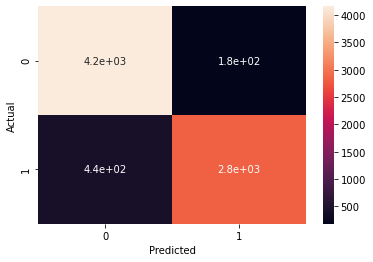

In [19]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

data = {'y_Actual':    ds["target"],
        'y_Predicted': pred
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)
plt.show()